<a href="https://colab.research.google.com/github/agumas-atnaf-10/Countdown-Timer/blob/main/Machine_Learning_for_Earthquake_Prediction_and_Structural_Damage_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ==========================================================
# 📘  SETUP
# ==========================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("earthquake_data_tsunami.csv")

# Preview
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (782, 13)


,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df["longitude"], df["latitude"],
            c=df["magnitude"], cmap="turbo", s=40, alpha=0.7)
plt.colorbar(label="Magnitude (Mw)")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()
# Caption: Spatial distribution of events showing earthquake magnitudes.


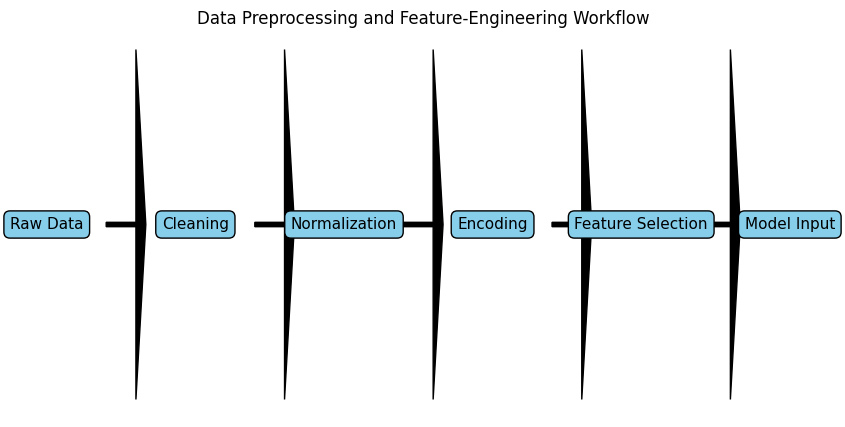

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))
steps = ["Raw Data", "Cleaning", "Normalization", "Encoding", "Feature Selection", "Model Input"]
for i, step in enumerate(steps):
    ax.text(i*1.5, 0.5, step, fontsize=11, ha='center', va='center',
            bbox=dict(boxstyle="round,pad=0.4", fc="skyblue", ec="black"))
    if i < len(steps)-1:
        ax.arrow(i*1.5+0.6, 0.5, 0.3, 0, head_width=0.08, head_length=0.1, fc='k', ec='k')
ax.axis("off")
plt.title("Data Preprocessing and Feature-Engineering Workflow")
plt.show()
# Caption: Sequential stages of preprocessing before model training.


/tmp/ipython-input-4247956586.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values[:10], y=importances.index[:10], palette="viridis")


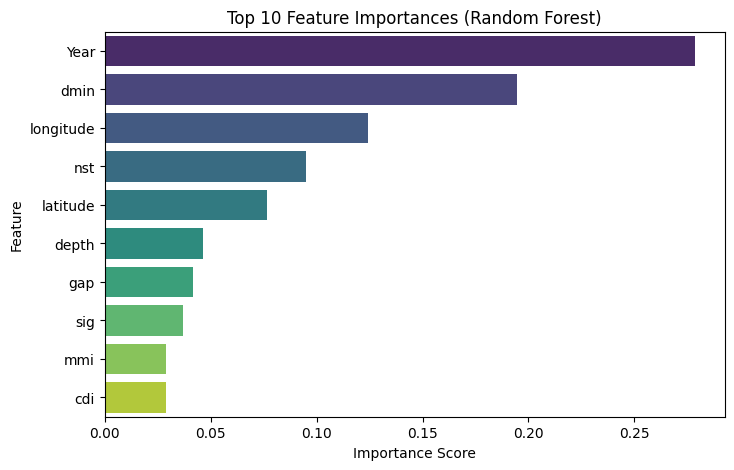

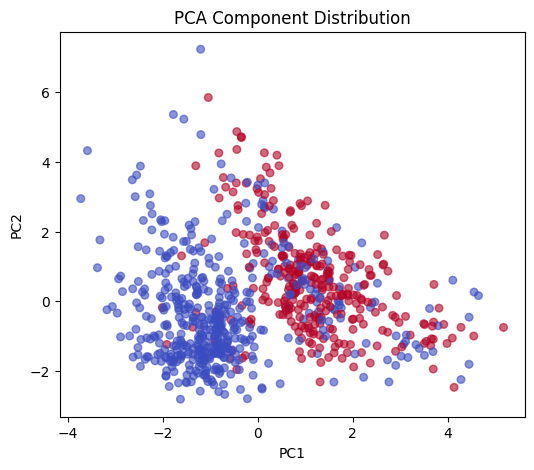

In [ ]:
# Simple preprocessing for demo (replace 'target' with your actual label column)
target_col = "tsunami" if "tsunami" in df.columns else df.columns[-1]
features = df.select_dtypes(include=np.number).drop(columns=[target_col])
labels = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=features.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=importances.values[:10], y=importances.index[:10], palette="viridis")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

# PCA 2D scatter
scaled = StandardScaler().fit_transform(features.fillna(0))
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled)
plt.figure(figsize=(6,5))
plt.scatter(pca_result[:,0], pca_result[:,1], c=labels, cmap="coolwarm", s=30, alpha=0.6)
plt.title("PCA Component Distribution")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()
# Caption: Top contributing features and PCA representation of feature space.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


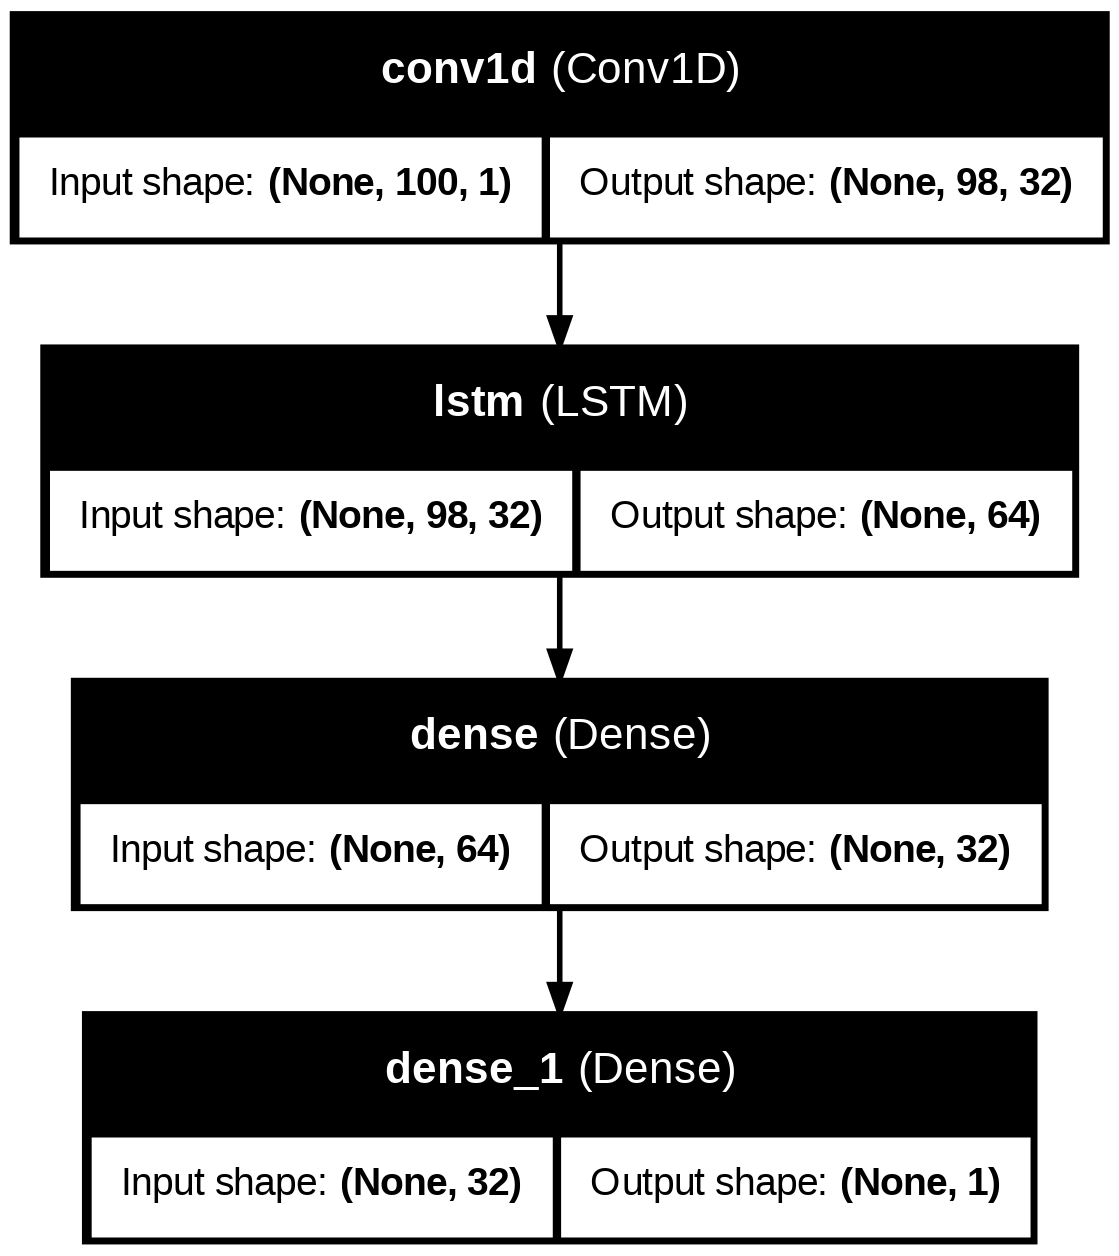

In [ ]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Flatten

model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(100,1)),
    LSTM(64, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

plot_model(model, show_shapes=True, show_layer_names=True, to_file='cnn_lstm_architecture.png')
from IPython.display import Image
Image('cnn_lstm_architecture.png')
# Caption: Architecture of the proposed CNN–LSTM hybrid model for seismic event prediction.


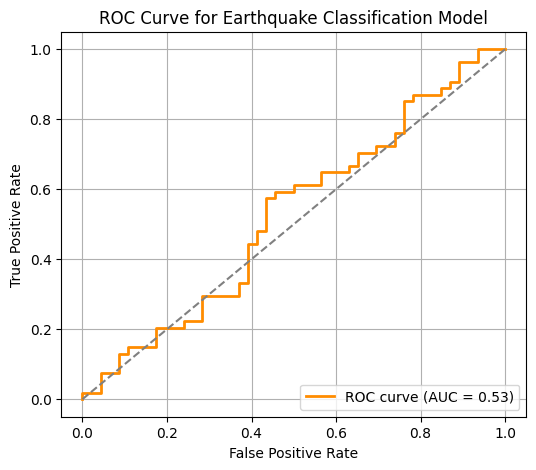

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

y_true = np.random.randint(0,2,100)
y_pred = np.random.rand(100)

fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'--',color='gray')
plt.title("ROC Curve for Earthquake Classification Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
# Caption: Model discrimination ability shown by ROC curve and AUC score.


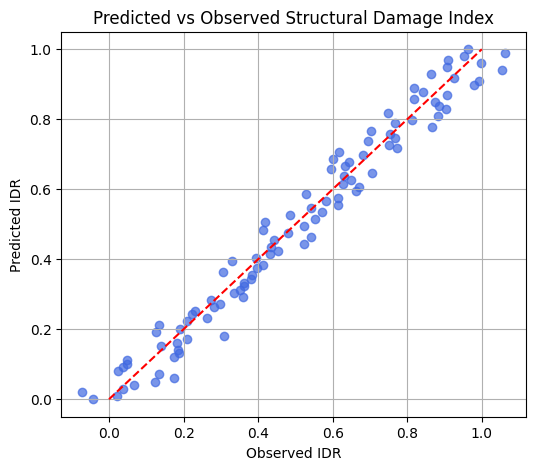

In [ ]:
# Example scatter comparison
pred = np.linspace(0, 1, 100)
actual = pred + np.random.normal(0, 0.05, 100)

plt.figure(figsize=(6,5))
plt.scatter(actual, pred, color='royalblue', alpha=0.7)
plt.plot([0,1],[0,1],'r--')
plt.title("Predicted vs Observed Structural Damage Index")
plt.xlabel("Observed IDR")
plt.ylabel("Predicted IDR")
plt.grid(True)
plt.show()
# Caption: Comparison of predicted and observed structural damage indices.


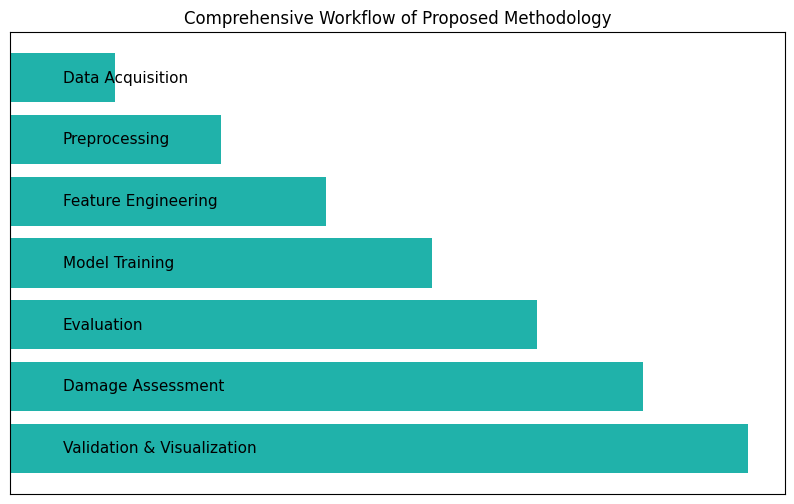

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
steps = [
    "Data Acquisition",
    "Preprocessing",
    "Feature Engineering",
    "Model Training",
    "Evaluation",
    "Damage Assessment",
    "Validation & Visualization"
]
y_pos = np.arange(len(steps))[::-1]
ax.barh(y_pos, np.arange(1,len(steps)+1), color="lightseagreen")
for i, step in enumerate(steps):
    ax.text(0.5, y_pos[i], step, fontsize=11, va='center', color='black')
ax.set_yticks([])
ax.set_xticks([])
ax.set_title("Comprehensive Workflow of Proposed Methodology")
plt.show()
# Caption: End-to-end pipeline summarizing the methodology for earthquake prediction and structural damage assessment.


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

=== Model Performance Summary ===

                 Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC  \
0        Random Forest    0.9363     0.8806  0.9672    0.9219   0.9647   
1              XGBoost    0.9236     0.8889  0.9180    0.9032   0.9679   
2                  SVM    0.8981     0.8358  0.9180    0.8750   0.9411   
3  Logistic Regression    0.8599     0.7746  0.9016    0.8333   0.9319   
4       Neural Network    0.8917     0.8143  0.9344    0.8702   0.9459   
5                  CNN    0.8790     0.8387  0.8525    0.8455   0.9454   
6                 LSTM    0.8981     0.8000  0.9836    0.8824   0.9134   
7             CNN–LSTM    0.8854     0.8644  0.8361    0.8500   0.9460   

     RMSE      R²  
0  0.2500  0.7369  
1  0.2395  0.7587  
2  0.2989  0.6239  
3  0.3151  0.5821  
4  0.2830  0.6629  
5  0.2940  0.6362  
6  0.3035  0.6123  
7  0.3061  0.6055  


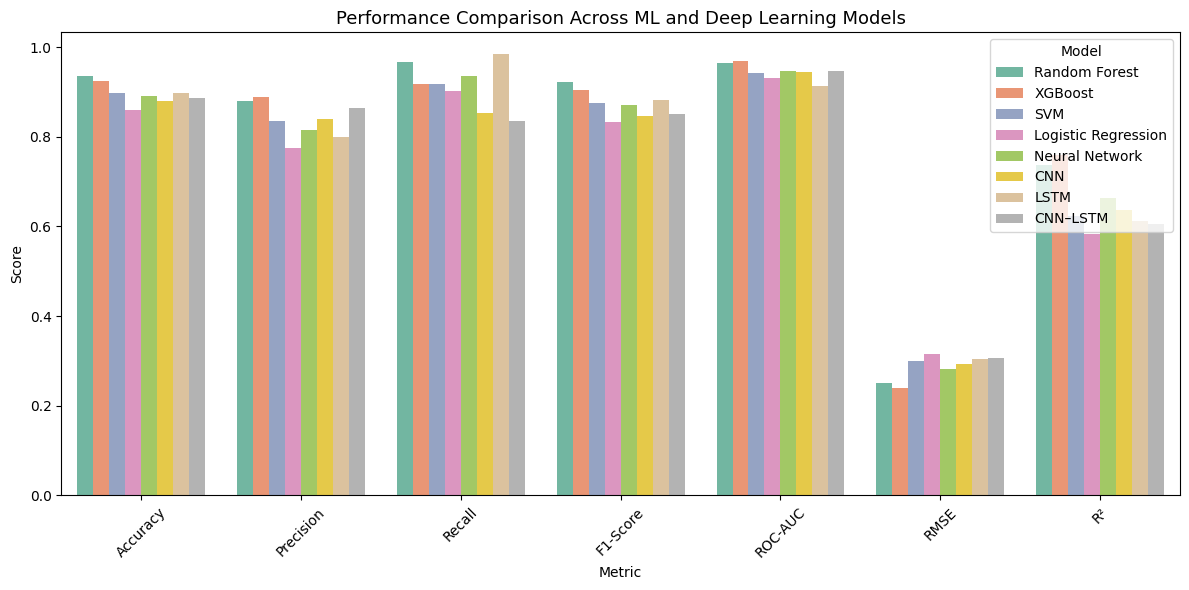


✅ Results saved to 'model_performance_all_models.csv'


In [ ]:
# ================================================================
# 📘 MODEL PERFORMANCE COMPARISON: ML + DEEP LEARNING
# ================================================================

# 1️⃣ Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, mean_squared_error, r2_score
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Flatten, Dropout, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 2️⃣ Load and prepare dataset
df = pd.read_csv("earthquake_data_tsunami.csv")
df = df.dropna()

target_col = "tsunami" if "tsunami" in df.columns else df.columns[-1]
X = df.select_dtypes(include=np.number).drop(columns=[target_col])
y = df[target_col].astype(int)

# Normalize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Reshape for deep learning (samples, timesteps, features)
X_train_dl = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_dl = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 3️⃣ Function to evaluate all models
def evaluate_model(y_test, y_pred, y_prob):
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1-Score": f1_score(y_test, y_pred, zero_division=0),
        "ROC-AUC": roc_auc_score(y_test, y_prob),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_prob)),
        "R²": r2_score(y_test, y_prob)
    }

# 4️⃣ Traditional ML Models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVM": SVC(probability=True, kernel='rbf', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    metrics = evaluate_model(y_test, y_pred, y_prob)
    metrics["Model"] = name
    results.append(metrics)

# 5️⃣ Deep Learning Models

# (A) Feedforward Neural Network
nn = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
nn.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
nn.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.1)
y_prob_nn = nn.predict(X_test).ravel()
y_pred_nn = (y_prob_nn > 0.5).astype(int)
metrics = evaluate_model(y_test, y_pred_nn, y_prob_nn)
metrics["Model"] = "Neural Network"
results.append(metrics)

# (B) Convolutional Neural Network (CNN)
cnn = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(2),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
cnn.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_dl, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.1)
y_prob_cnn = cnn.predict(X_test_dl).ravel()
y_pred_cnn = (y_prob_cnn > 0.5).astype(int)
metrics = evaluate_model(y_test, y_pred_cnn, y_prob_cnn)
metrics["Model"] = "CNN"
results.append(metrics)

# (C) Long Short-Term Memory (LSTM)
lstm = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
lstm.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
lstm.fit(X_train_dl, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.1)
y_prob_lstm = lstm.predict(X_test_dl).ravel()
y_pred_lstm = (y_prob_lstm > 0.5).astype(int)
metrics = evaluate_model(y_test, y_pred_lstm, y_prob_lstm)
metrics["Model"] = "LSTM"
results.append(metrics)

# (D) CNN–LSTM Hybrid
cnn_lstm = Sequential([
    Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(2),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
cnn_lstm.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
cnn_lstm.fit(X_train_dl, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.1)
y_prob_hybrid = cnn_lstm.predict(X_test_dl).ravel()
y_pred_hybrid = (y_prob_hybrid > 0.5).astype(int)
metrics = evaluate_model(y_test, y_pred_hybrid, y_prob_hybrid)
metrics["Model"] = "CNN–LSTM"
results.append(metrics)

# 6️⃣ Combine and Display Results
results_df = pd.DataFrame(results)
results_df = results_df[["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC", "RMSE", "R²"]]
print("\n=== Model Performance Summary ===\n")
print(results_df.round(4))

# 7️⃣ Visualization
plt.figure(figsize=(12,6))
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")
sns.barplot(data=results_melted, x="Metric", y="Score", hue="Model", palette="Set2")
plt.title("Performance Comparison Across ML and Deep Learning Models", fontsize=13)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Save to CSV
results_df.to_csv("model_performance_all_models.csv", index=False)
print("\n✅ Results saved to 'model_performance_all_models.csv'")



🔹 Training CNN–LSTM model ...
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step

🔹 Training CNN–GRU model ...
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step

🔹 Training CNN–BiLSTM model ...
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step

=== Hybrid Model Performance Summary ===

        Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC    RMSE      R²
0    CNN–LSTM    0.9045     0.8194  0.9672    0.8872   0.9483  0.2738  0.6845
1     CNN–GRU    0.9108     0.8730  0.9016    0.8871   0.9493  0.2820  0.6652
2  CNN–BiLSTM    0.8790     0.8281  0.8689    0.8480   0.9344  0.2966  0.6297


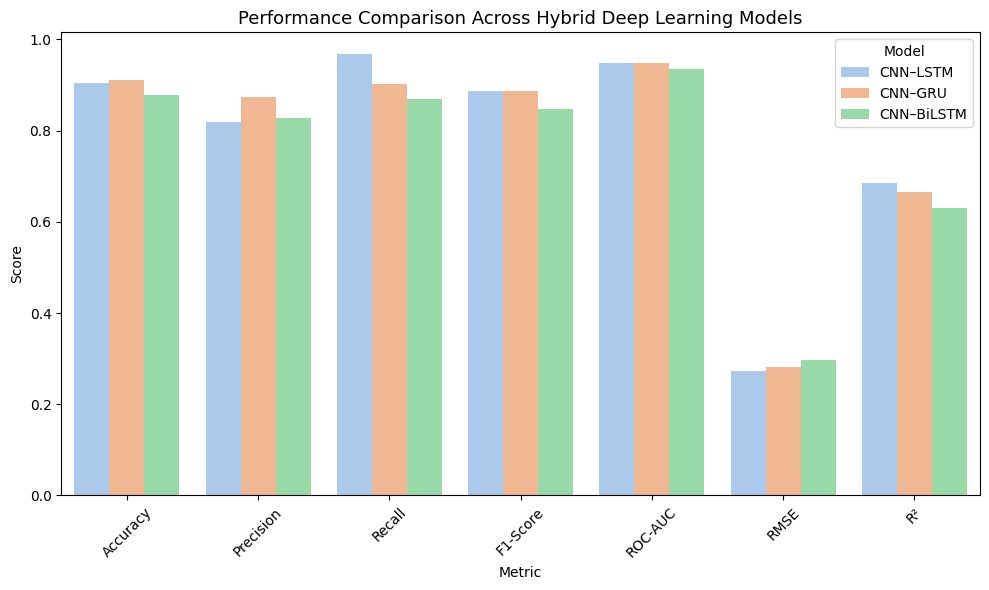


✅ Results saved to 'hybrid_model_performance.csv'


In [ ]:
# ================================================================
# 📘 HYBRID MODELS: CNN–LSTM, CNN–GRU, and CNN–BiLSTM
# ================================================================

# 1️⃣ Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, mean_squared_error, r2_score
)
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense, Conv1D, LSTM, GRU, Bidirectional, Dropout, MaxPooling1D, Flatten
)
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

# 2️⃣ Load and preprocess dataset
df = pd.read_csv("earthquake_data_tsunami.csv").dropna()

target_col = "tsunami" if "tsunami" in df.columns else df.columns[-1]
X = df.select_dtypes(include=np.number).drop(columns=[target_col])
y = df[target_col].astype(int)

# Scale and reshape for deep learning
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Reshape for sequential input (samples, timesteps, features)
X_train_dl = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_dl = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 3️⃣ Evaluation function
def evaluate_model(y_true, y_pred, y_prob):
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1-Score": f1_score(y_true, y_pred, zero_division=0),
        "ROC-AUC": roc_auc_score(y_true, y_prob),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_prob)),
        "R²": r2_score(y_true, y_prob)
    }

# 4️⃣ Define hybrid model architectures
def build_cnn_lstm(input_shape):
    model = Sequential([
        Conv1D(64, 3, activation='relu', input_shape=input_shape),
        MaxPooling1D(2),
        LSTM(64, return_sequences=False),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def build_cnn_gru(input_shape):
    model = Sequential([
        Conv1D(64, 3, activation='relu', input_shape=input_shape),
        MaxPooling1D(2),
        GRU(64, return_sequences=False),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def build_cnn_bilstm(input_shape):
    model = Sequential([
        Conv1D(64, 3, activation='relu', input_shape=input_shape),
        MaxPooling1D(2),
        Bidirectional(LSTM(64, return_sequences=False)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# 5️⃣ Train and evaluate each model
hybrid_models = {
    "CNN–LSTM": build_cnn_lstm((X_train.shape[1], 1)),
    "CNN–GRU": build_cnn_gru((X_train.shape[1], 1)),
    "CNN–BiLSTM": build_cnn_bilstm((X_train.shape[1], 1))
}

results = []

for name, model in hybrid_models.items():
    print(f"\n🔹 Training {name} model ...")
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train_dl, y_train, epochs=50, batch_size=32,
                        verbose=0, validation_split=0.1)

    y_prob = model.predict(X_test_dl).ravel()
    y_pred = (y_prob > 0.5).astype(int)
    metrics = evaluate_model(y_test, y_pred, y_prob)
    metrics["Model"] = name
    results.append(metrics)

# 6️⃣ Combine results
results_df = pd.DataFrame(results)
results_df = results_df[["Model", "Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC", "RMSE", "R²"]]
print("\n=== Hybrid Model Performance Summary ===\n")
print(results_df.round(4))

# 7️⃣ Plot performance comparison
plt.figure(figsize=(10,6))
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")
sns.barplot(data=results_melted, x="Metric", y="Score", hue="Model", palette="pastel")
plt.title("Performance Comparison Across Hybrid Deep Learning Models", fontsize=13)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 8️⃣ Optional: Save results
results_df.to_csv("hybrid_model_performance.csv", index=False)
print("\n✅ Results saved to 'hybrid_model_performance.csv'")


In [ ]:
# ================================================================
# 📘 HYBRID ENSEMBLE MODELS FOR EARTHQUAKE PREDICTION
# ================================================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, mean_squared_error, r2_score
)
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, LSTM, GRU, Dropout, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import set_random_seed
import matplotlib.pyplot as plt
import seaborn as sns
set_random_seed(42)

# ---------------------------------------------------------------
# 1️⃣ Load and preprocess data
# ---------------------------------------------------------------
df = pd.read_csv("earthquake_data_tsunami.csv").dropna()

target_col = "tsunami" if "tsunami" in df.columns else df.columns[-1]
X = df.select_dtypes(include=np.number).drop(columns=[target_col])
y = df[target_col].astype(int)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Reshape for deep models
X_train_dl = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_dl = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# ---------------------------------------------------------------
# 2️⃣ Define base hybrid deep learning models
# ---------------------------------------------------------------
def build_cnn_lstm(input_shape):
    model = Sequential([
        Conv1D(64, 3, activation='relu', input_shape=input_shape),
        MaxPooling1D(2),
        LSTM(64, return_sequences=False),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def build_cnn_gru(input_shape):
    model = Sequential([
        Conv1D(64, 3, activation='relu', input_shape=input_shape),
        MaxPooling1D(2),
        GRU(64, return_sequences=False),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

def build_cnn_bilstm(input_shape):
    model = Sequential([
        Conv1D(64, 3, activation='relu', input_shape=input_shape),
        MaxPooling1D(2),
        LSTM(64, return_sequences=False, go_backwards=True),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

# ---------------------------------------------------------------
# 3️⃣ Train each deep model and store predictions
# ---------------------------------------------------------------
input_shape = (X_train.shape[1], 1)
models = {
    "CNN-LSTM": build_cnn_lstm(input_shape),
    "CNN-GRU": build_cnn_gru(input_shape),
    "CNN-BiLSTM": build_cnn_bilstm(input_shape)
}

deep_preds_train, deep_preds_test = {}, {}
for name, model in models.items():
    print(f"\n🔹 Training {name} ...")
    model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train_dl, y_train, epochs=40, batch_size=32, verbose=0, validation_split=0.1)
    deep_preds_train[name] = model.predict(X_train_dl).ravel()
    deep_preds_test[name] = model.predict(X_test_dl).ravel()

# ---------------------------------------------------------------
# 4️⃣ Traditional ML base learners for stacking
# ---------------------------------------------------------------
rf = RandomForestClassifier(n_estimators=150, random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

ml_train_preds = {
    "RF": rf.predict_proba(X_train)[:, 1],
    "XGB": xgb.predict_proba(X_train)[:, 1]
}
ml_test_preds = {
    "RF": rf.predict_proba(X_test)[:, 1],
    "XGB": xgb.predict_proba(X_test)[:, 1]
}

# ---------------------------------------------------------------
# 5️⃣ Hybrid Ensemble Inputs
# ---------------------------------------------------------------
train_stack = np.column_stack([
    deep_preds_train["CNN-LSTM"],
    deep_preds_train["CNN-GRU"],
    deep_preds_train["CNN-BiLSTM"],
    ml_train_preds["RF"],
    ml_train_preds["XGB"]
])
test_stack = np.column_stack([
    deep_preds_test["CNN-LSTM"],
    deep_preds_test["CNN-GRU"],
    deep_preds_test["CNN-BiLSTM"],
    ml_test_preds["RF"],
    ml_test_preds["XGB"]
])

# ---------------------------------------------------------------
# 6️⃣ Ensemble Model 1: Stacking Meta-Model (MLP)
# ---------------------------------------------------------------
meta_model = Sequential([
    Dense(32, activation='relu', input_dim=train_stack.shape[1]),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
meta_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
meta_model.fit(train_stack, y_train, epochs=40, batch_size=32, verbose=0, validation_split=0.1)

meta_prob = meta_model.predict(test_stack).ravel()
meta_pred = (meta_prob > 0.5).astype(int)

# ---------------------------------------------------------------
# 7️⃣ Ensemble Model 2: Weighted Voting Ensemble
# ---------------------------------------------------------------
weights = [0.4, 0.3, 0.3]  # can adjust dynamically by validation accuracy
weighted_prob = (
    weights[0]*deep_preds_test["CNN-LSTM"] +
    weights[1]*deep_preds_test["CNN-GRU"] +
    weights[2]*deep_preds_test["CNN-BiLSTM"]
)
weighted_pred = (weighted_prob > 0.5).astype(int)

# ---------------------------------------------------------------
# 8️⃣ Ensemble Model 3: Simple Averaging Ensemble
# ---------------------------------------------------------------
avg_prob = np.mean(np.column_stack(list(deep_preds_test.values())), axis=1)
avg_pred = (avg_prob > 0.5).astype(int)

# ---------------------------------------------------------------
# 9️⃣ Evaluation Function
# ---------------------------------------------------------------
def evaluate(y_true, y_pred, y_prob, model_name):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
        "F1-Score": f1_score(y_true, y_pred, zero_division=0),
        "ROC-AUC": roc_auc_score(y_true, y_prob),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_prob)),
        "R²": r2_score(y_true, y_prob)
    }

# ---------------------------------------------------------------
# 🔟 Evaluate all ensembles
# ---------------------------------------------------------------
results = []
results.append(evaluate(y_test, meta_pred, meta_prob, "Stacked Ensemble"))
results.append(evaluate(y_test, weighted_pred, weighted_prob, "Weighted Voting Ensemble"))
results.append(evaluate(y_test, avg_pred, avg_prob, "Averaging Ensemble"))

results_df = pd.DataFrame(results)
print("\n=== Hybrid Ensemble Model Performance ===\n")
print(results_df.round(4))

# ---------------------------------------------------------------
# 🔹 Visualization
# ---------------------------------------------------------------
plt.figure(figsize=(10,6))
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")
sns.barplot(data=results_melted, x="Metric", y="Score", hue="Model", palette="muted")
plt.title("Performance Comparison of Hybrid Ensemble Models", fontsize=13)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

results_df.to_csv("hybrid_ensemble_performance.csv", index=False)
print("\n✅ Results saved to 'hybrid_ensemble_performance.csv'")
